In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv("../data/terrain.csv")

In [6]:
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


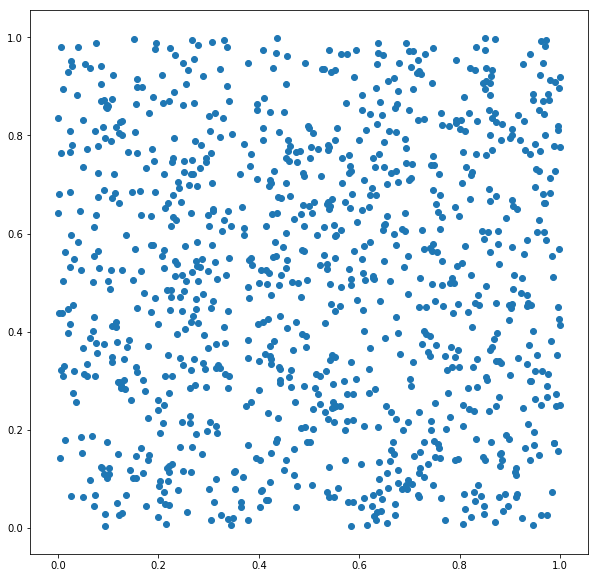

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"])
plt.show()

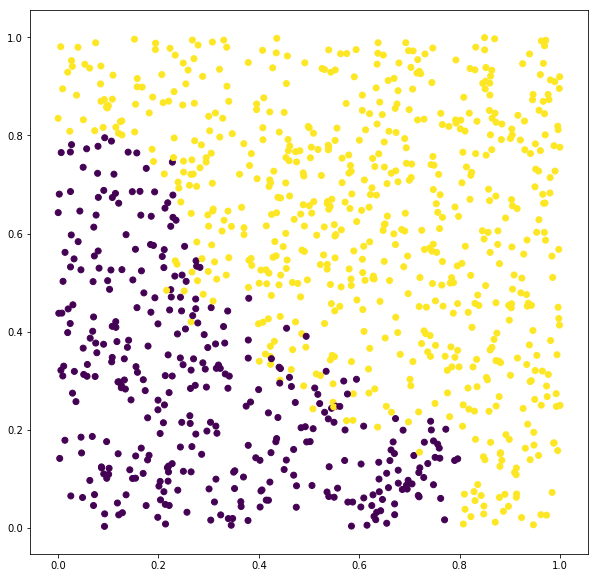

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [9]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [11]:
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [12]:
clf.predict([[0.4,0.6]])

array([ 1.])

In [13]:
# We can make a 2d representation
# For this we create a mesh and we predict for each point in the mesh

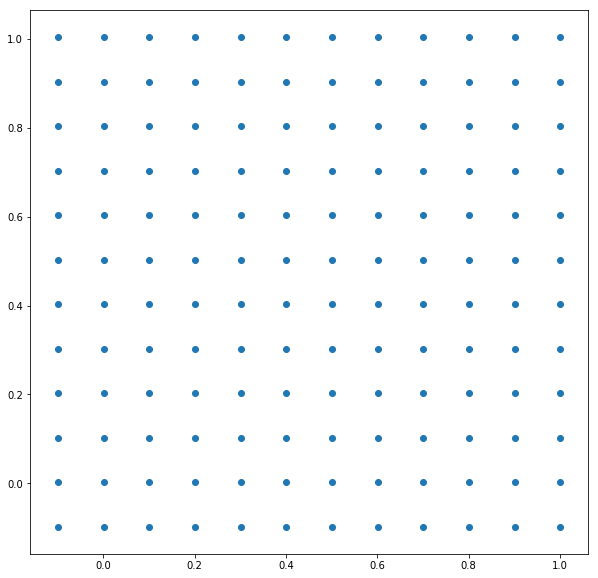

In [14]:
h = .1
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
plt.figure(figsize=(10,10))
plt.scatter(xx, yy)
plt.show()

In [24]:
def represent_clf(clf,X,y,h = .1,show=False):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,10))
    plt.scatter(xx, yy,c=Z)
    if show:
        plt.scatter(X[:,0],X[:,1],c=y,cmap="rainbow")
    return plt.show()

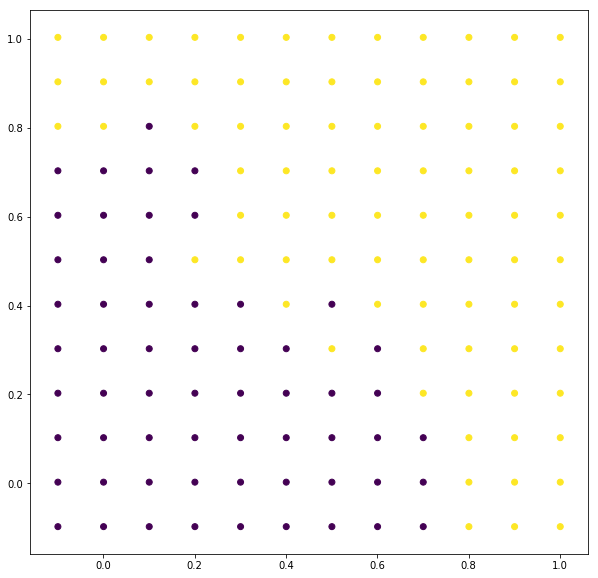

In [25]:
represent_clf(clf,X,y)

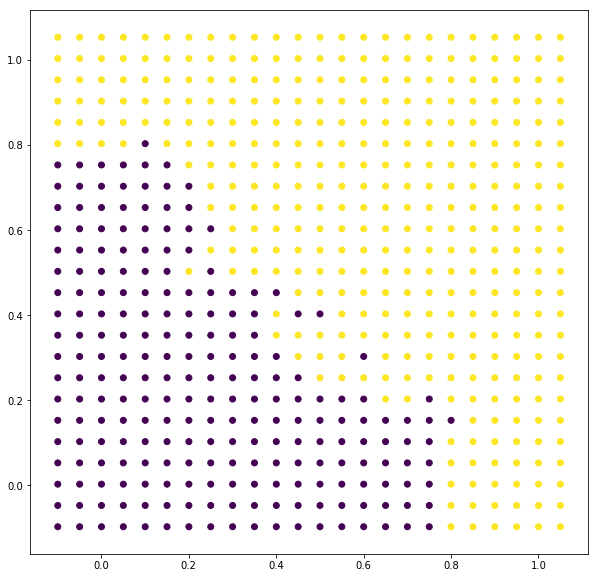

In [26]:
represent_clf(clf,X,y,0.05)

In [27]:
# And now we reduce the size of the grid for higher resolution

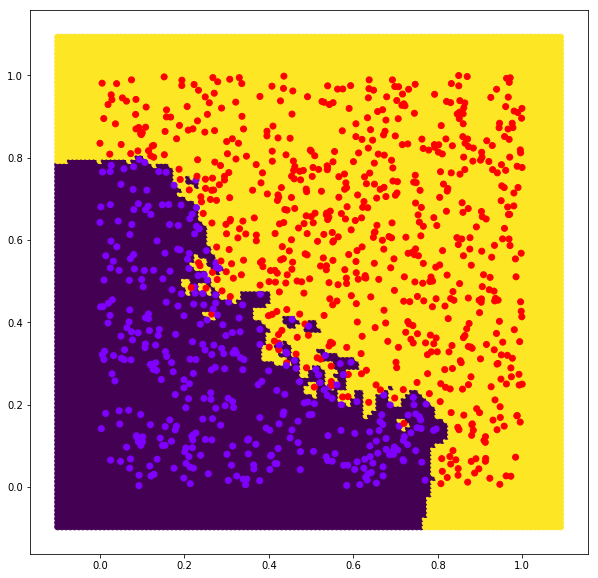

In [30]:
represent_clf(clf,X,y,0.01,True)

In [24]:
## Check out the overfitting !!

In [31]:
from sklearn.model_selection import train_test_split
# Train - Test Split
# Calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.9303030303030303

In [34]:
# Crossval score
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=10,scoring="accuracy")

array([ 0.91089109,  0.92079208,  0.92079208,  0.93      ,  0.96      ,
        0.95      ,  0.95      ,  0.90909091,  0.93939394,  0.93939394])

In [35]:
np.mean(cross_val_score(clf,X,y,cv=10,scoring="accuracy"))

0.93303540354035397

In [36]:
# Grid Search
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf_good = GridSearchCV(KNeighborsClassifier(),param_grid={"n_neighbors":range(1,30)},scoring="accuracy")

In [39]:
clf_good.fit(X_train,y_train)
print(clf_good.best_params_)

{'n_neighbors': 8}


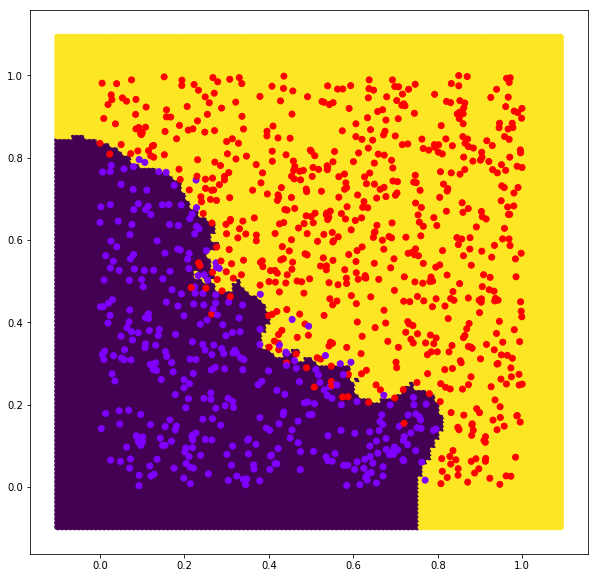

In [41]:
represent_clf(clf_good,X,y,0.01,True)

In [42]:
np.mean(cross_val_score(clf_good,X,y,cv=10,scoring="accuracy"))

0.94997659765976594

In [43]:
accuracy_score(clf_good.predict(X_test),y_test)

0.94545454545454544